<a href="https://colab.research.google.com/github/karolke99/nn_dl/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Assignment 3
Karol Waligora

## Keras approach

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from keras.datasets import cifar10

from keras.applications.resnet import ResNet50

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=256,
    validation_data=(x_test,y_test),
    callbacks=[early_stopping],
    verbose=2,
    shuffle=True
)

Epoch 1/50
196/196 - 18s - loss: 1.4545 - accuracy: 0.5164 - val_loss: 1.2175 - val_accuracy: 0.5752 - 18s/epoch - 93ms/step
Epoch 2/50
196/196 - 5s - loss: 1.1571 - accuracy: 0.5936 - val_loss: 1.1113 - val_accuracy: 0.6093 - 5s/epoch - 28ms/step
Epoch 3/50
196/196 - 6s - loss: 1.0543 - accuracy: 0.6253 - val_loss: 1.0862 - val_accuracy: 0.6230 - 6s/epoch - 31ms/step
Epoch 4/50
196/196 - 6s - loss: 0.9962 - accuracy: 0.6466 - val_loss: 1.0775 - val_accuracy: 0.6235 - 6s/epoch - 30ms/step
Epoch 5/50
196/196 - 6s - loss: 0.9484 - accuracy: 0.6602 - val_loss: 1.0535 - val_accuracy: 0.6312 - 6s/epoch - 29ms/step
Epoch 6/50
196/196 - 6s - loss: 0.9084 - accuracy: 0.6778 - val_loss: 1.0840 - val_accuracy: 0.6321 - 6s/epoch - 30ms/step
Epoch 7/50
196/196 - 6s - loss: 0.8720 - accuracy: 0.6883 - val_loss: 1.0523 - val_accuracy: 0.6391 - 6s/epoch - 30ms/step
Epoch 8/50
196/196 - 6s - loss: 0.8411 - accuracy: 0.7001 - val_loss: 1.0547 - val_accuracy: 0.6385 - 6s/epoch - 29ms/step
Epoch 9/50
196

In [ ]:
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']

In [ ]:
y_pred = model.predict(x_test)
score = model.evaluate(x_test, y_test)
print(f'Loss, Accuracy: {score}')

313/313 [==============================] - 6s 18ms/step - loss: 1.0482 - accuracy: 0.6471
Loss, Accuracy: [1.0482114553451538, 0.6470999717712402]


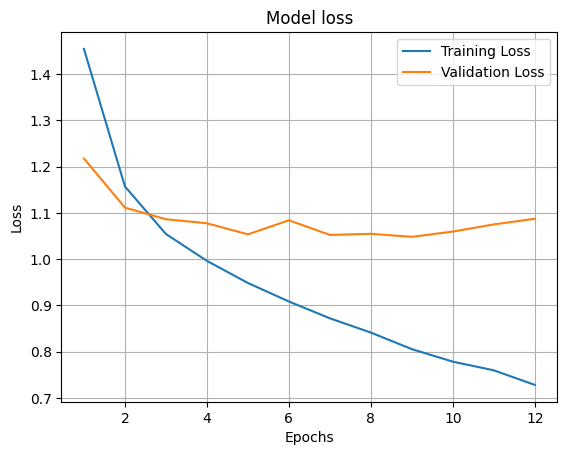

In [ ]:
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('Model loss')
plt.show()

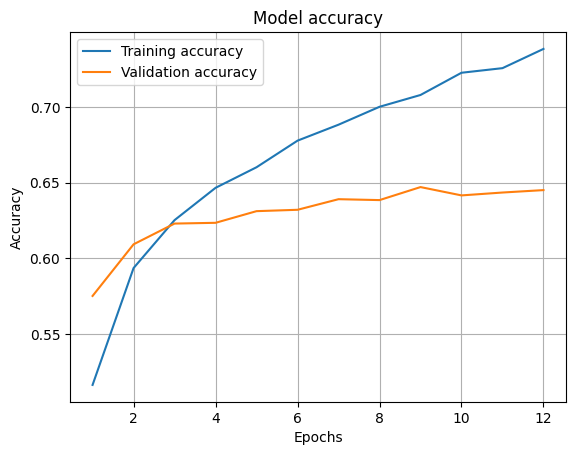

In [ ]:
plt.figure()
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

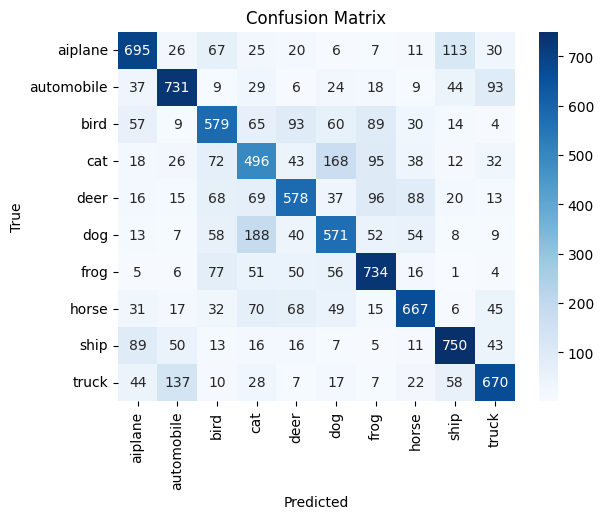

In [ ]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

class_names = ['aiplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## PyTorch Approach

In [ ]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
train_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

In [ ]:
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_ftrs = model.fc.in_features

In [ ]:
classifier = nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(),
    nn.BatchNorm1d(1024),
    nn.Dropout(0.5),
    nn.Linear(1024, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.Softmax()
)


model.fc = classifier

In [ ]:
for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [ ]:
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(10):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(y_pred.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = correct_predictions / total_samples

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            y_pred = model(inputs)
            loss = criterion(y_pred, labels)
            val_loss += loss.item()

            _, predicted = torch.max(y_pred.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = correct_predictions / total_samples

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{10}, "
          f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}, "
          f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch: 0; loss: 1.7354835271835327
Epoch 1/10, Train Loss: 1.7177, Train Accuracy: 0.7516, Validation Loss: 1.6782, Validation Accuracy: 0.7850
Epoch: 1; loss: 1.79740571975708
Epoch 2/10, Train Loss: 1.6834, Train Accuracy: 0.7780, Validation Loss: 1.6763, Validation Accuracy: 0.7859
Epoch: 2; loss: 1.7100812196731567
Epoch 3/10, Train Loss: 1.6744, Train Accuracy: 0.7862, Validation Loss: 1.6594, Validation Accuracy: 0.8007
Epoch: 3; loss: 1.7056398391723633
Epoch 4/10, Train Loss: 1.6705, Train Accuracy: 0.7899, Validation Loss: 1.6724, Validation Accuracy: 0.7875
Epoch: 4; loss: 1.823911190032959
Epoch 5/10, Train Loss: 1.6666, Train Accuracy: 0.7938, Validation Loss: 1.6614, Validation Accuracy: 0.7984
Epoch: 5; loss: 1.6906009912490845
Epoch 6/10, Train Loss: 1.6632, Train Accuracy: 0.7973, Validation Loss: 1.6600, Validation Accuracy: 0.8006
Epoch: 6; loss: 1.7678301334381104
Epoch 7/10, Train Loss: 1.6623, Train Accuracy: 0.7982, Validation Loss: 1.6554, Validation Accuracy: 0.

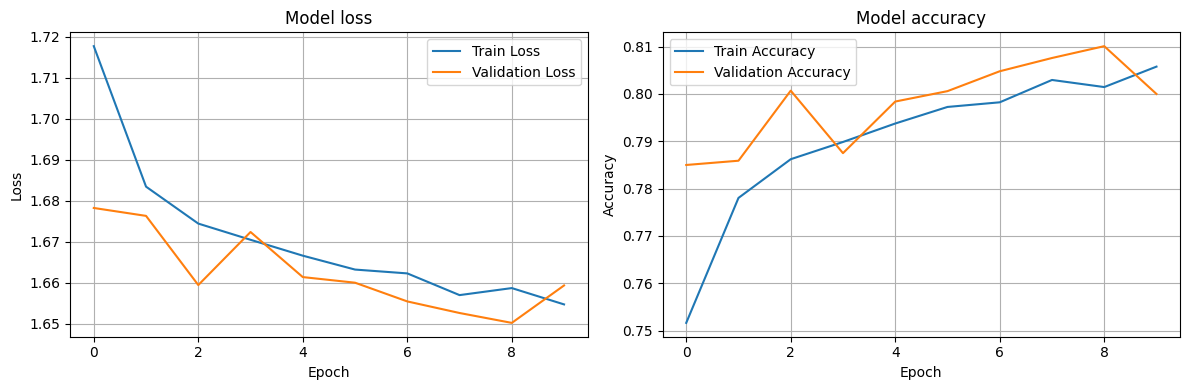

In [ ]:
import matplotlib.pyplot as plt
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model accuracy')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
test_accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy: {test_accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Test Accuracy: 0.8000


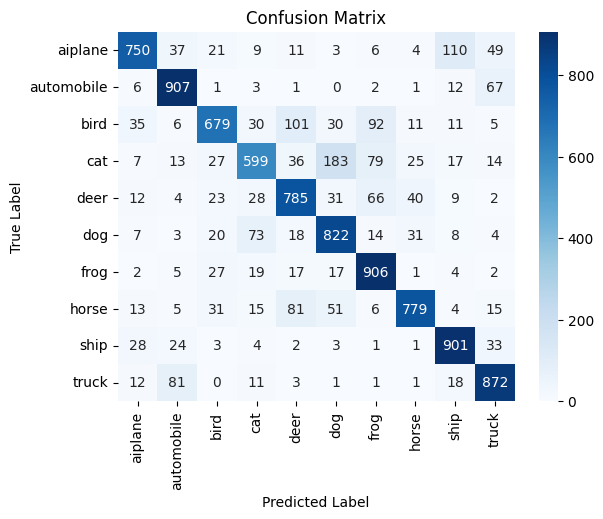

In [ ]:


class_names = ['aiplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Summary

Model trained in PyTorch Approach has much better accuracy on validation dataset. It turns out that in keras the accuracy is only 64.7% whilst for PyTorch it is 80%. However in keras the early stopping was used which migh have stopped the model from training to perform better. I tried to keep the same layers in both models.

What is interesting both models havee some issues with distinguishing atuomobiles vs. trucks or dogs. vs. cats. I came to these conclusions based on the confusion matrix. In general, the models perform well and the confusion matrices seem to look appropriate.